<a href="https://colab.research.google.com/github/Junyoungs7/Colab_ML_DL_Python/blob/main/DACON_CLF_WITH_Ensemble_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA 코드


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/train.csv')
data = data.drop('id', axis=1)
data

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


# 결측치 확인(누락된 데이터: NA)



In [5]:
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = []
  for i, col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 컬럼은: {col}입니다.')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
  if counted_missing_col == 0:
    print('결측치가 존재하지 않습니다.')
  return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않으므로 별도의 결측치 처리는 필요하지 않음.

# 데이터 시각화

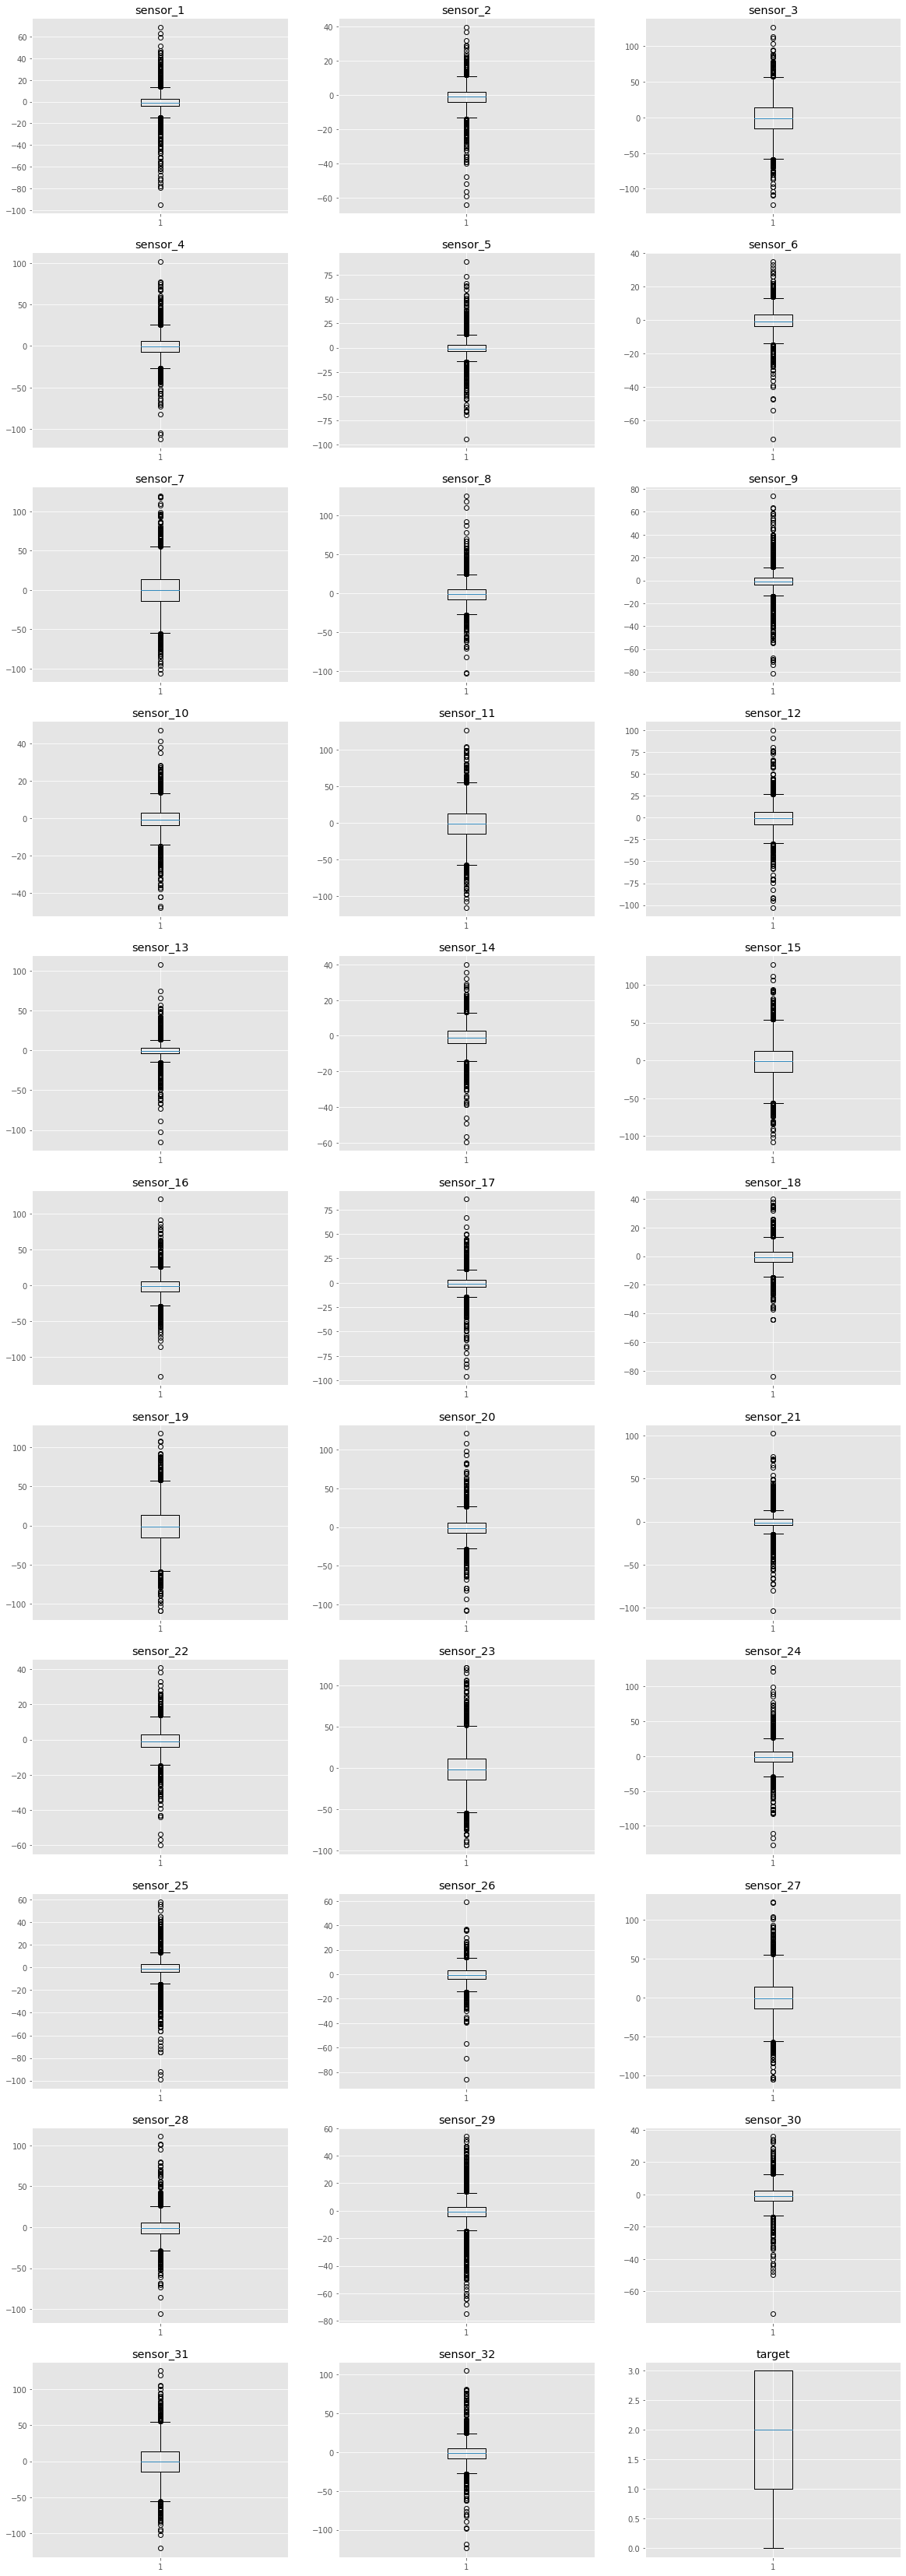

In [6]:
plt.style.use("ggplot")

feature = data.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)):
  plt.subplot(11,3,i+1)
  plt.title(feature[i])
  plt.boxplot(data[feature[i]])
plt.show()

# 상관관계 시각화

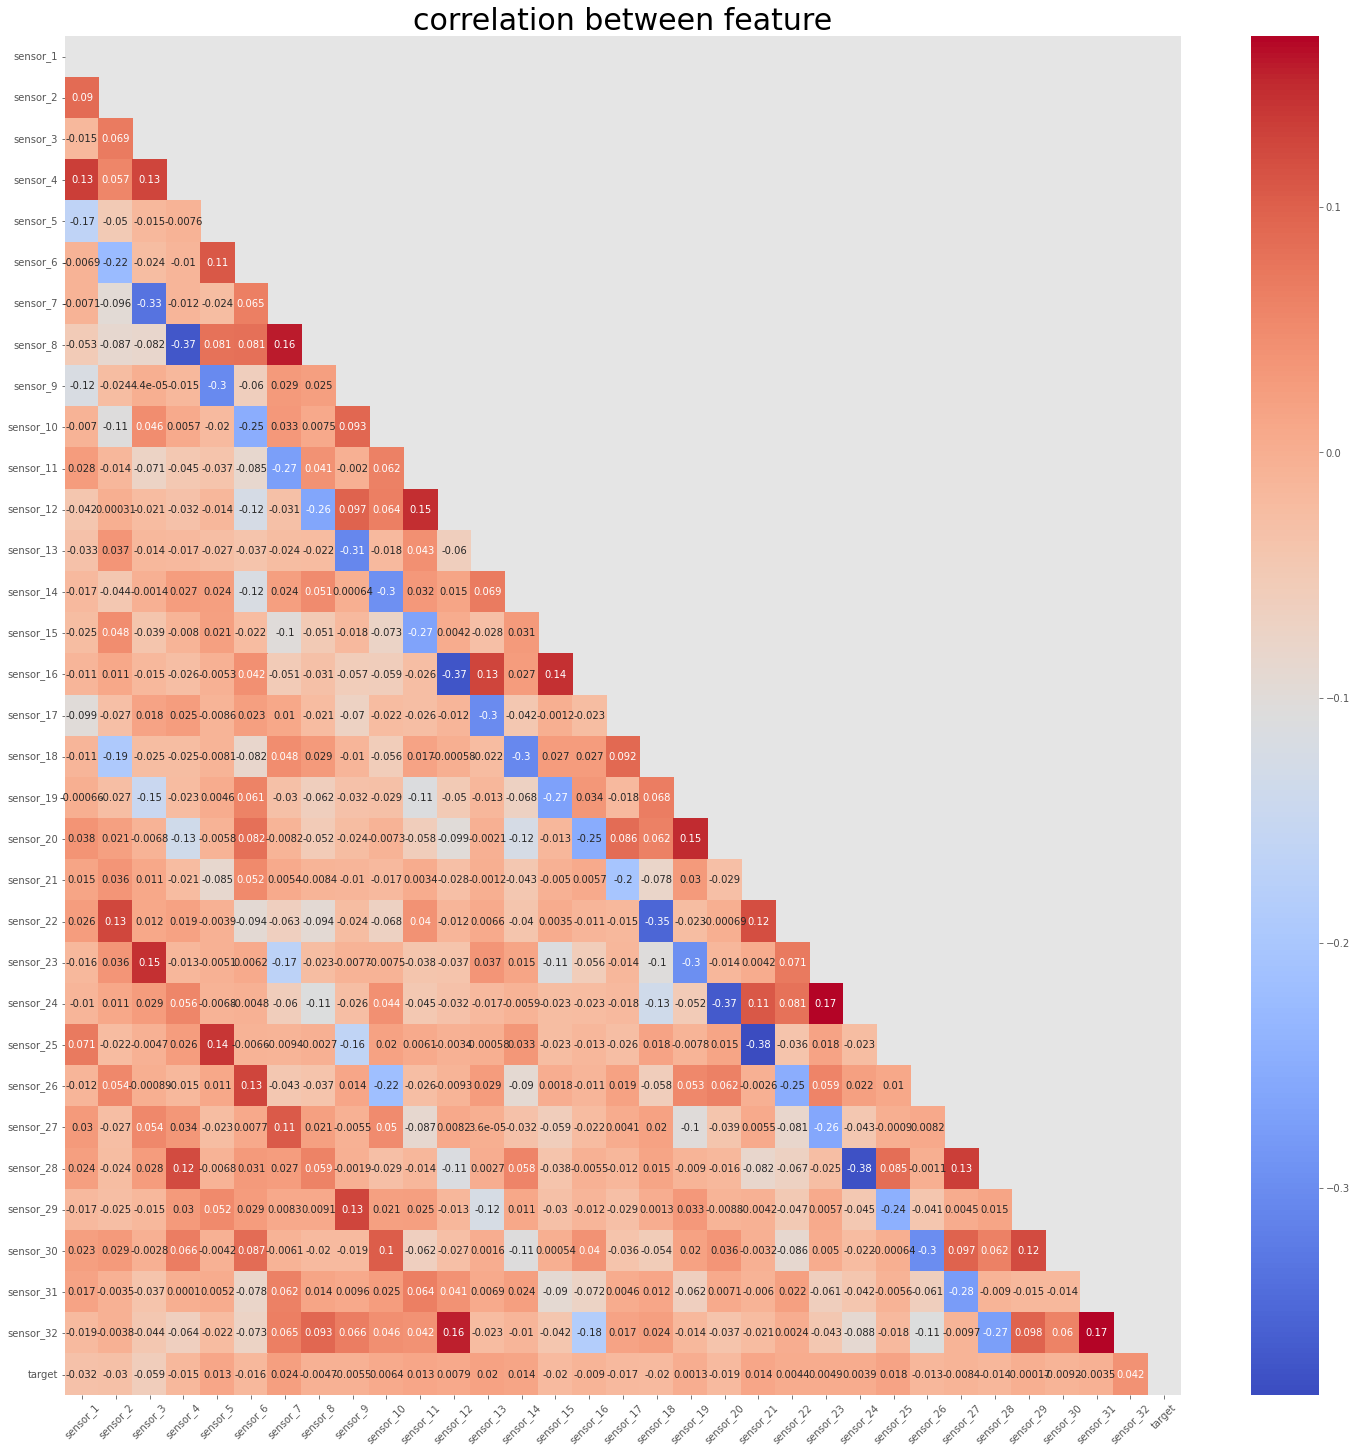

In [7]:
plt.figure(figsize=(25,25))

heat_table = data.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between feature', fontsize=30)
plt.show()

# Target과 다른 feature들과의 관계

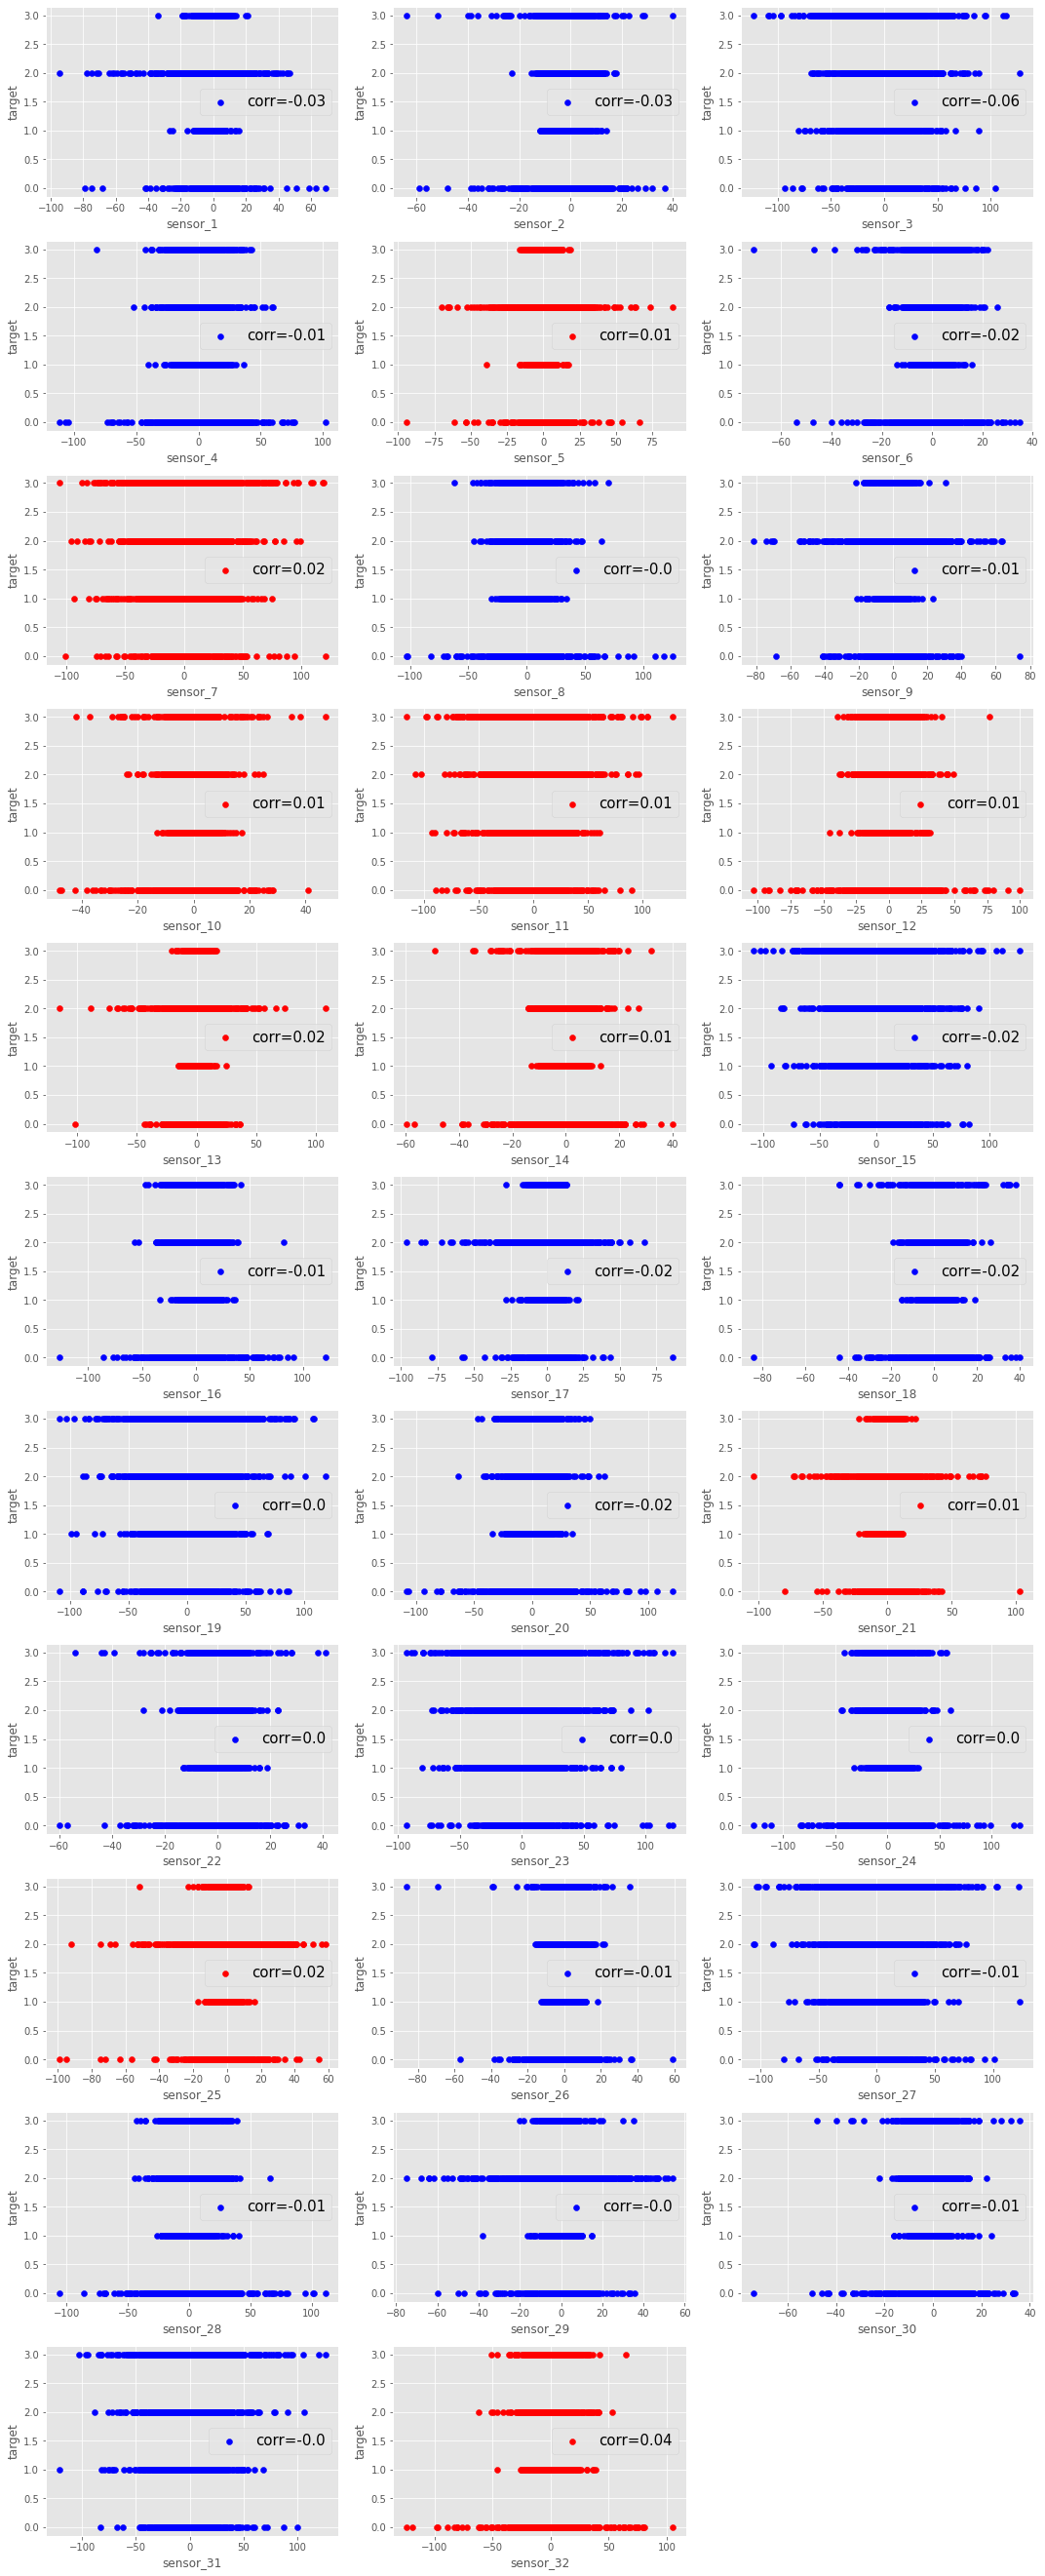

In [8]:
target = "target"
feature = data.columns

plt.figure(figsize=(15,40))

for i in range(len(feature[:-1])):
  plt.subplot(11,3,i+1)
  plt.xlabel(feature[i])
  plt.ylabel(target)
  corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
  c = 'red' if corr_score > 0 else 'blue'
  plt.scatter(data[feature[i]], data[target], color=c, label=f"corr={corr_score}")
  plt.legend(fontsize=15)
plt.tight_layout(rect=[0,0.03, 1, 0.95])
plt.show()

# 데이터 분리

In [9]:
train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/train.csv')
train_X = train.drop(['id','target'],axis=1)
train_y = train.target

# RandomForest를 이용한 정형 데이터 분류

**Bagging**: 데이터가 모델에 투입되기 전 데이터를 여러개의 부분 집합으로 분할

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

RandomForestClassifier()

In [14]:
test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/test.csv')
test.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [15]:
test_X = test.drop(['id'],axis=1)
pred = clf.predict(test_X)

In [16]:
submission = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [18]:
submission['target'] = pred
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,0
9340,9341,2
9341,9342,0


In [19]:
submission.to_csv('submit.csv',index=False)

# 앙상블 기법: GridSearchCV

**정규화**: min-max

In [20]:
train_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/train.csv')
train_x = train_data.drop(['id','target'], axis=1)
train_y = train_data.target

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

clfs = []

rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
clfs.append(rf)
clfs.append(gbc)
clfs.append(etc)

params = []

params_rf = {'n_estimators':[90, 100, 110, 120], 'min_samples_split':[2, 3, 4]}
params.append(params_rf)

params_gbc = {'learning_rate':[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15], 'n_estimators':[60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}
params.append(params_gbc)

params_etc = {'n_estimators':[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}
params.append(params_etc)

In [23]:
from tqdm.auto import tqdm
def gridSearchCV(models,params):
  best_models=[]
  for i in tqdm(range(0,len(models))):
    model_grid = GridSearchCV(models[i], params[i], n_jobs=10, verbose=1, cv=5)
    model_grid.fit(train_x, train_y)
    best_models.append(model_grid.best_estimator_)
  return best_models

best_model_list = gridSearchCV(clfs, params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 110 candidates, totalling 550 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [24]:
best_model_list

[RandomForestClassifier(min_samples_split=4, n_estimators=120),
 GradientBoostingClassifier(learning_rate=0.13, n_estimators=150),
 ExtraTreesClassifier(n_estimators=130)]

GridSearchCV를 통해 최적화된 모델들을 voting을 통해 사용

In [25]:
best_models = [
      ('rf', RandomForestClassifier(n_estimators=120, min_samples_split=4)),
      ('GBR', GradientBoostingClassifier(learning_rate=0.13, n_estimators=150)),
      ('ET', ExtraTreesClassifier(n_estimators=130))
]

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=best_models, voting='soft')
voting_clf.fit(train_x, train_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_split=4,
                                                     n_estimators=120)),
                             ('GBR',
                              GradientBoostingClassifier(learning_rate=0.13,
                                                         n_estimators=150)),
                             ('ET', ExtraTreesClassifier(n_estimators=130))],
                 voting='soft')

In [26]:
sample_submission = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/sample_submission.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/DACON_손동작 분류/hand_gesture_data/test.csv')
test_x = test_data.drop("id",axis=1)
test_x = scaler.transform(test_x)

predictions = voting_clf.predict(test_x)

sample_submission.target = predictions
sample_submission.to_csv("ensemble_submission.csv", index = False)